In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#1. Basic python and statistics
import pandas as pd
df = pd.read_csv('/content/archive.zip')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [66]:
#Identify numerical columns:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [71]:
df.duplicated().sum()

0

In [72]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [73]:
#Pregnancies and Age:
#Correlation = 0.544341.
#This indicates a moderately strong positive correlation, which makes sense as older individuals might have experienced more pregnancies.

df['Pregnancies'].corr(df['Age'])

0.5443412284023394

In [74]:
#Glucose and Outcome:
df['Glucose'].corr(df['Outcome'])
#A moderately strong positive correlation suggests that higher glucose levels are associated with a higher likelihood of a positive diabetes outcome.

0.46658139830687295

In [75]:
#BMI and Outcome:
df['BMI'].corr(df['Outcome'])
print("A weaker positive correlation suggests that BMI influences the diabetes outcome but not as strongly as glucose.")
print(df['BMI'].corr(df['Outcome']))

A weaker positive correlation suggests that BMI influences the diabetes outcome but not as strongly as glucose.
0.29269466264444494


In [76]:
#SkinThickness and Insulin:
df['SkinThickness'].corr(df['Insulin'])
#This is a moderately strong positive correlation, possibly because higher skin thickness measurements are linked with higher insulin levels.



0.4367825701200126

In [77]:
#BloodPressure and Insulin:
df['BloodPressure'].corr(df['Insulin'])
#A near-zero value indicates almost no relationship between blood pressure and insulin.



0.08893337837319316

In [78]:
#Calculating Statistical Measures
#We'll compute the Mean, Median, Mode, and Standard Deviation for each numerical column.
print(df['Pregnancies'].mean())
#Calculating Statistical Measures
#We'll compute the Mean, Median, Mode, and Standard Deviation for each numerical column.
print(df['Pregnancies'].mean())
print(df['Pregnancies'].mode())
print(df['Pregnancies'].std())
print(df['Pregnancies'].median())
print(df['Pregnancies'].min())
print(df['Pregnancies'].max())
print(df['Pregnancies'].var())
print(df['Pregnancies'].count())
print(df['Pregnancies'].quantile(0.25))
print(df['Pregnancies'].quantile(0.5))
print(df['Pregnancies'].quantile(0.75))
print(df['Pregnancies'].quantile(0.9))
print(df['Pregnancies'].quantile(0.99))
print(df['Pregnancies'].quantile(0.999))
print(df['Pregnancies'].quantile(0.9999))
print(df['Pregnancies'].quantile(0.99999))


3.8450520833333335
3.8450520833333335
0    1
Name: Pregnancies, dtype: int64
3.3695780626988623
3.0
0
17
11.35405632062142
768
1.0
3.0
6.0
9.0
13.0
15.466000000000122
16.846599999999853
16.984660000000076


In [79]:
print(df['Glucose'].mean())
print(df['Glucose'].median())
print(df['Glucose'].mode())
print(df['Glucose'].std())
print(df['Glucose'].min())
print(df['Glucose'].max())
print(df['Glucose'].var())
print(df['Glucose'].count())
print(df['Glucose'].quantile(0.25))
print(df['Glucose'].quantile(0.5))
print(df['Glucose'].quantile(0.75))
print(df['Glucose'].quantile(0.9))

120.89453125
117.0
0     99
1    100
Name: Glucose, dtype: int64
31.97261819513622
0
199
1022.2483142519557
768
99.0
117.0
140.25
167.0


In [80]:
print(df['BloodPressure'].mean())
print(df['BloodPressure'].median())
print(df['BloodPressure'].mode())
print(df['BloodPressure'].std())
print(df['BloodPressure'].min())
print(df['BloodPressure'].max())
print(df['BloodPressure'].var())
print(df['BloodPressure'].count())
print(df['BloodPressure'].quantile(0.25))
print(df['BloodPressure'].quantile(0.5))
print(df['BloodPressure'].quantile(0.75))
print(df['BloodPressure'].quantile(0.9))

69.10546875
72.0
0    70
Name: BloodPressure, dtype: int64
19.355807170644777
0
122
374.6472712271838
768
62.0
72.0
80.0
88.0


In [81]:
print(df['SkinThickness'].mean())
print(df['SkinThickness'].median())
print(df['SkinThickness'].mode())
print(df['SkinThickness'].std())
print(df['SkinThickness'].min())
print(df['SkinThickness'].max())
print(df['SkinThickness'].var())
print(df['SkinThickness'].count())
print(df['SkinThickness'].quantile(0.25))
print(df['SkinThickness'].quantile(0.5))
print(df['SkinThickness'].quantile(0.75))

20.536458333333332
23.0
0    0
Name: SkinThickness, dtype: int64
15.952217567727677
0
99
254.47324532811953
768
0.0
23.0
32.0


In [82]:
print(df['Insulin'].mean())
print(df['Insulin'].median())
print(df['Insulin'].mode())
print(df['Insulin'].std())
print(df['Insulin'].min())
print(df['Insulin'].max())
print(df['Insulin'].var())
print(df['Insulin'].count())
print(df['Insulin'].quantile(0.25))
print(df['Insulin'].quantile(0.5))
print(df['Insulin'].quantile(0.75))

79.79947916666667
30.5
0    0
Name: Insulin, dtype: int64
115.24400235133837
0
846
13281.180077955281
768
0.0
30.5
127.25


In [83]:
print(df['BMI'].mean())
print(df['BMI'].median())
print(df['BMI'].mode())
print(df['BMI'].std())
print(df['BMI'].min())
print(df['BMI'].max())
print(df['BMI'].var())
print(df['BMI'].count())
print(df['BMI'].quantile(0.25))
print(df['BMI'].quantile(0.5))
print(df['BMI'].quantile(0.75))

31.992578124999998
32.0
0    32.0
Name: BMI, dtype: float64
7.8841603203754405
0.0
67.1
62.15998395738257
768
27.3
32.0
36.6


In [84]:
#Central Tendency:
print(df['Pregnancies'].mean())
print(df['Glucose'].mean())
print(df['BloodPressure'].mean())
print(df['SkinThickness'].mean())
print(df['Insulin'].mean())
print(df['BMI'].mean())

3.8450520833333335
120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999998


In [85]:
#Variability:
print(df['Pregnancies'].std())
print(df['Glucose'].std())
print(df['BloodPressure'].std())
print(df['SkinThickness'].std())
print(df['Insulin'].std())
print(df['BMI'].std())

3.3695780626988623
31.97261819513622
19.355807170644777
15.952217567727677
115.24400235133837
7.8841603203754405


In [86]:
#Outliers
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)
print(df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)])
print(df['Pregnancies'].mean())
print(df['Pregnancies'].median())
print(df['Pregnancies'].mode())
print(df['Pregnancies'].std())
print(df['Pregnancies'].min())
print(df['Pregnancies'].max())
print(df['Pregnancies'].var())
print(df['Pregnancies'].count())

5.0
-6.5
13.5
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
3.8450520833333335
3.0
0    1
Name: Pregnancies, dtype: int64
3.3695780626988623
0
17
11.35405632062142
768


In [87]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

41.25


In [88]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

18.0


In [89]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

32.0


In [90]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

127.25


In [91]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.3


In [92]:
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.38249999999999995


In [93]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

17.0


In [94]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



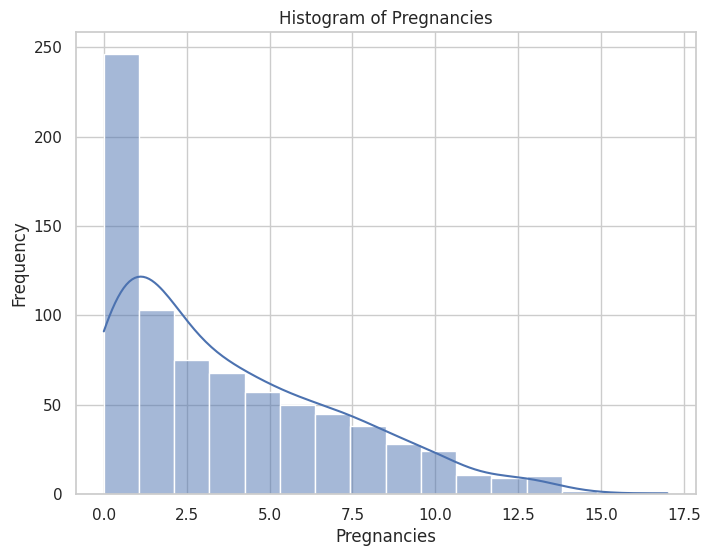

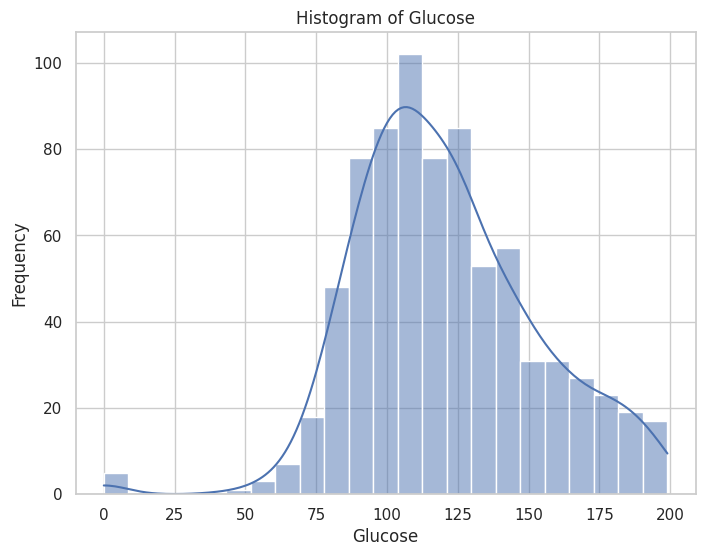

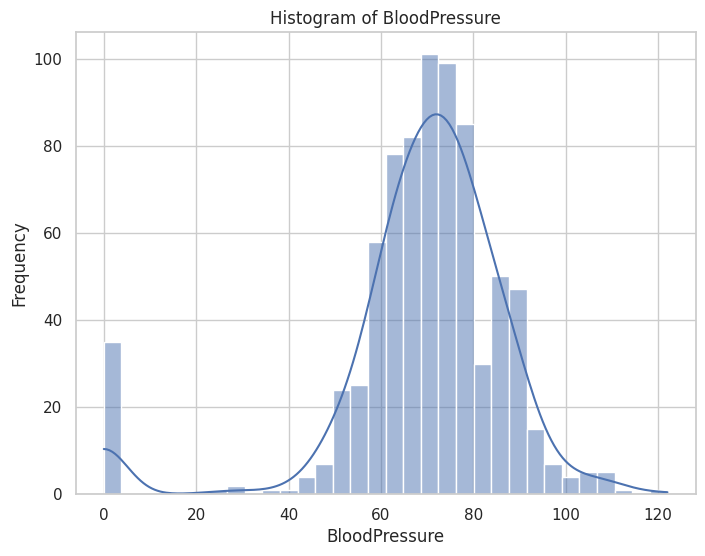

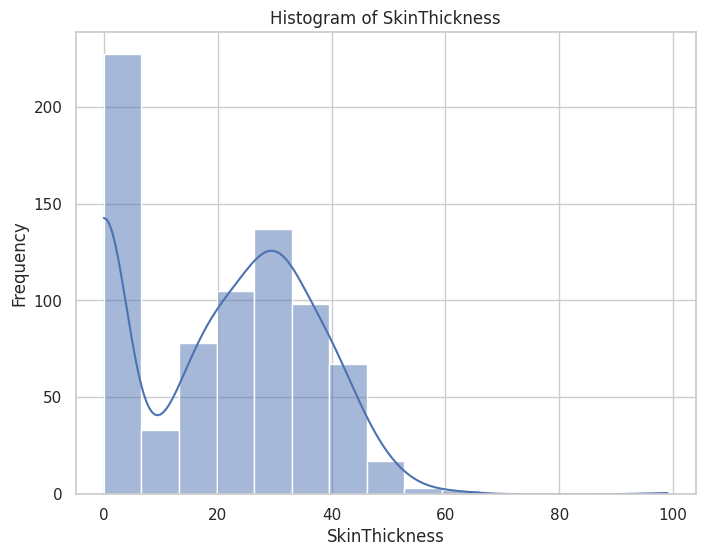

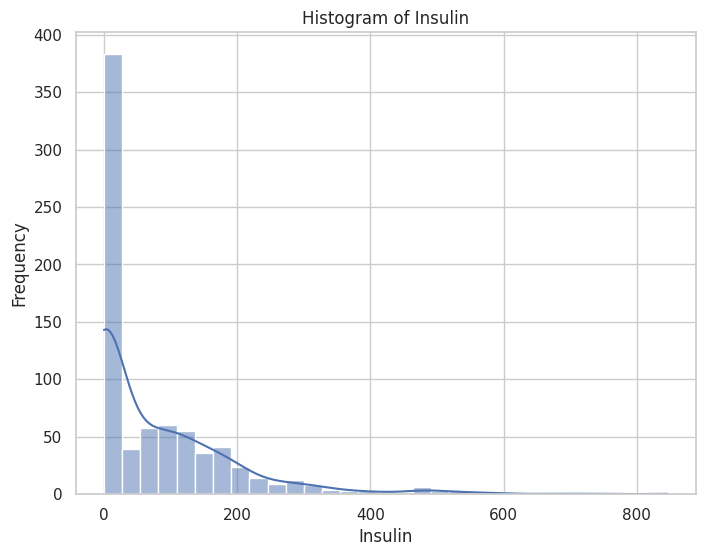

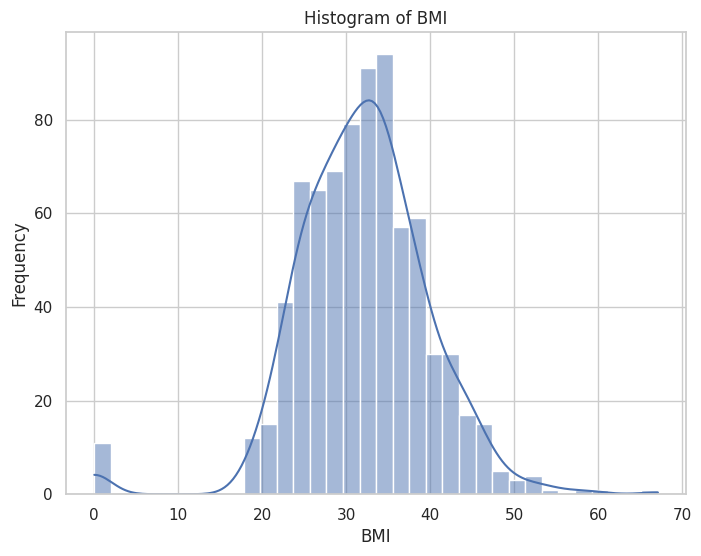

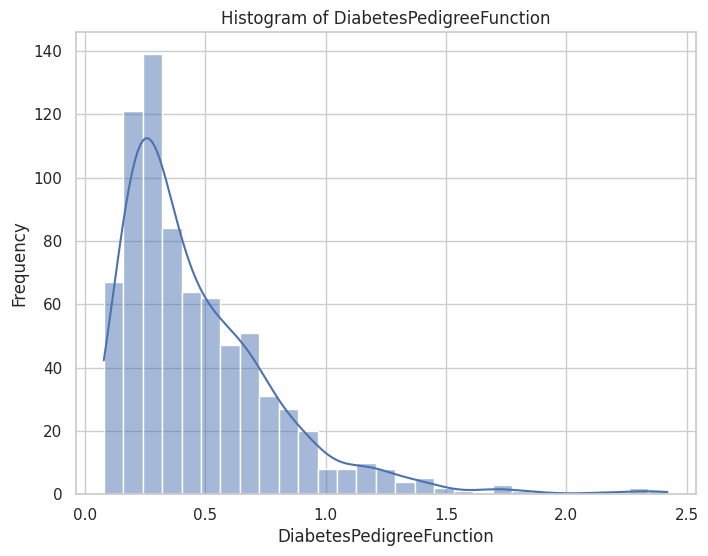

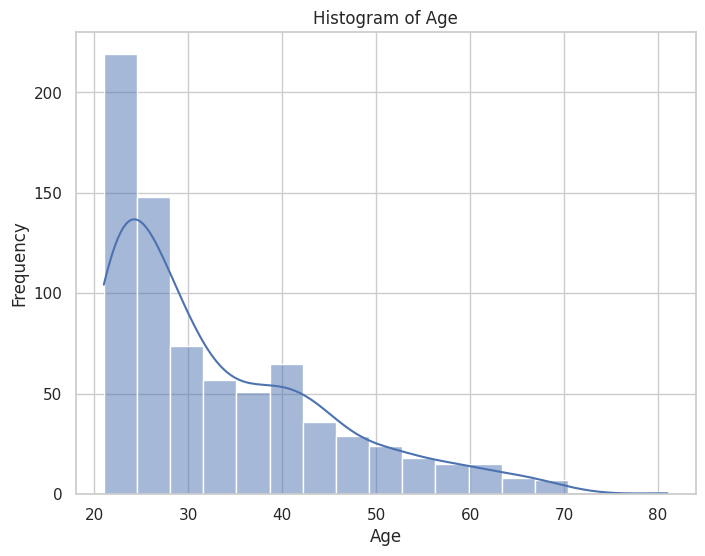

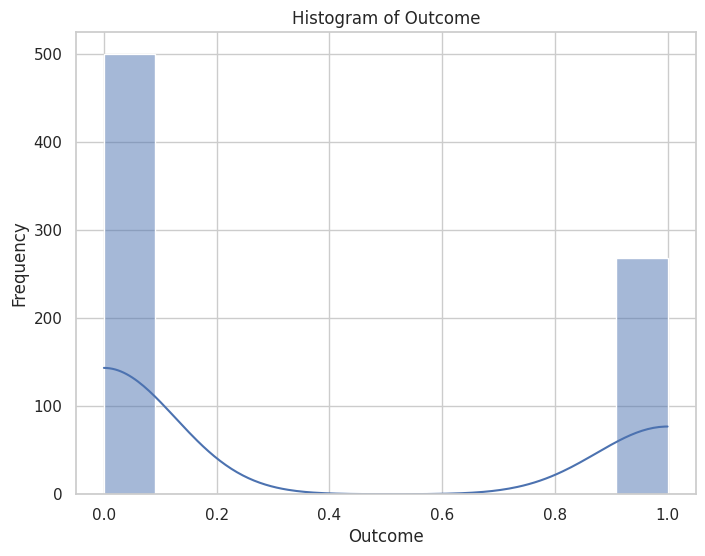

In [95]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

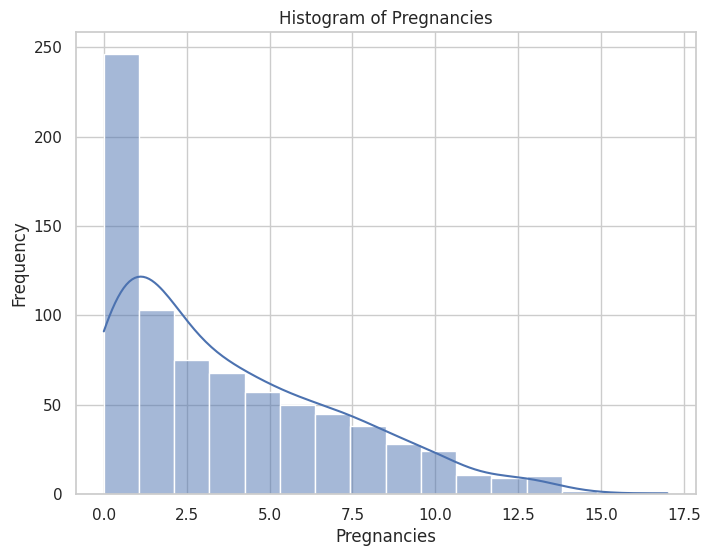

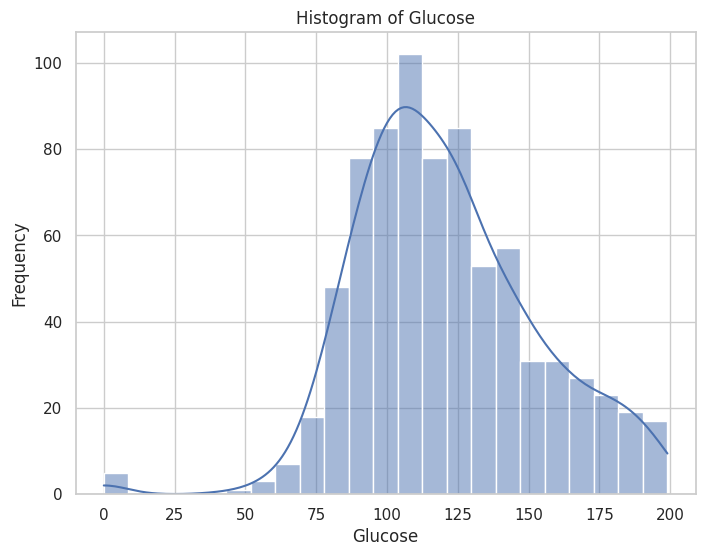

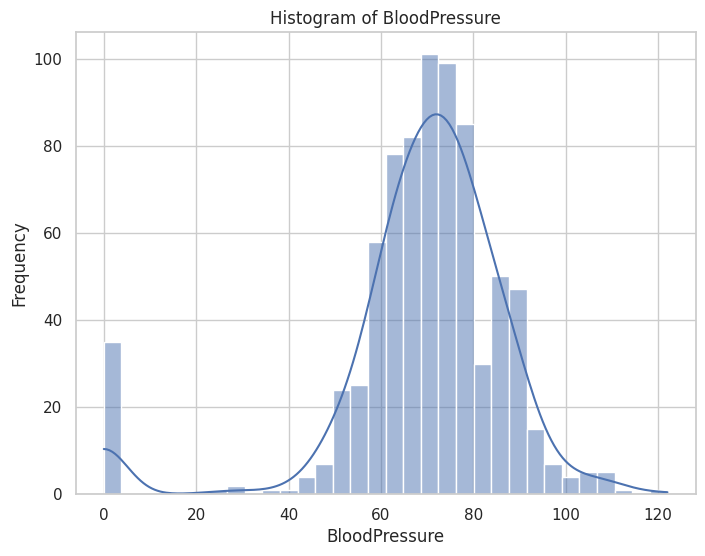

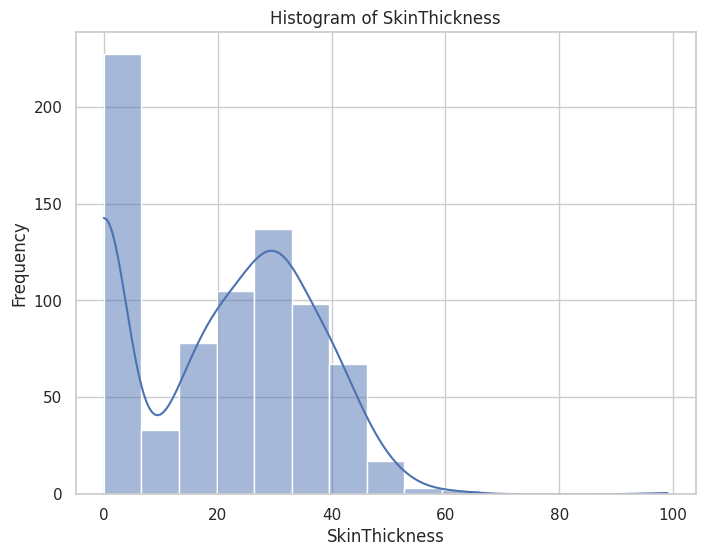

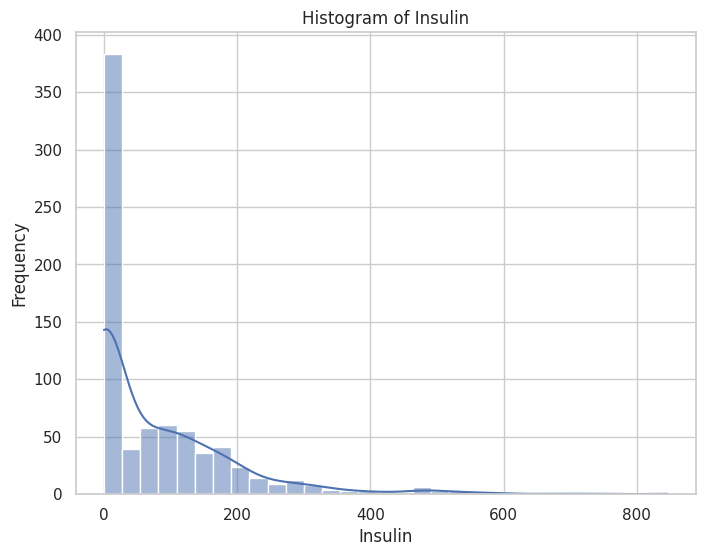

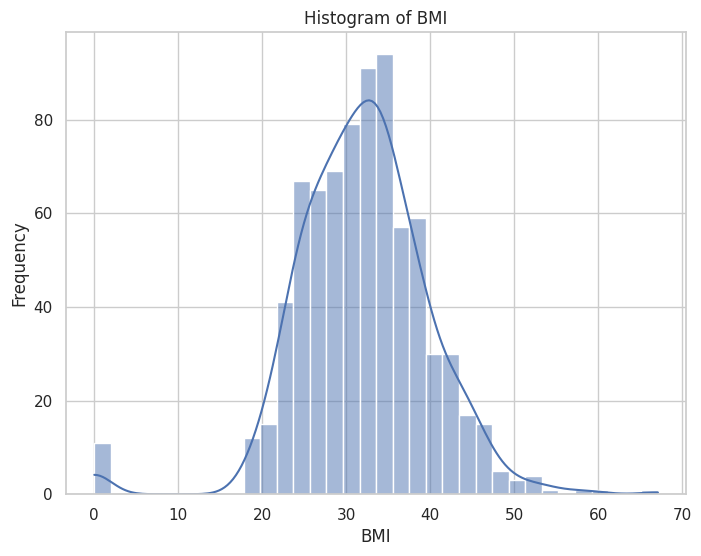

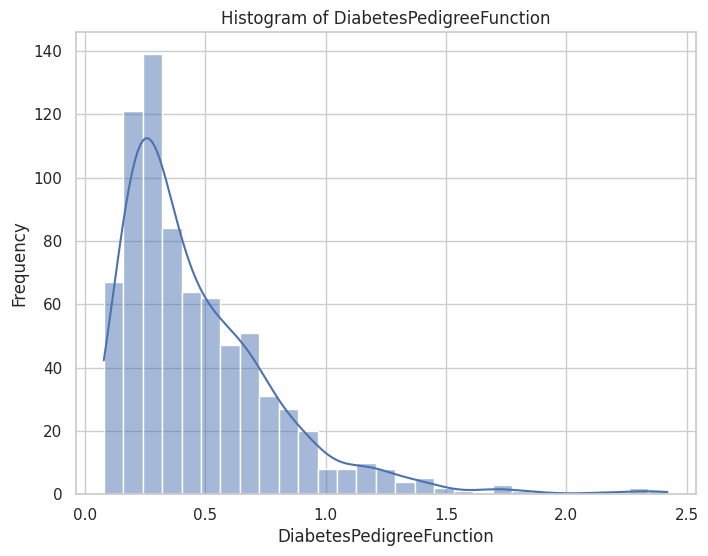

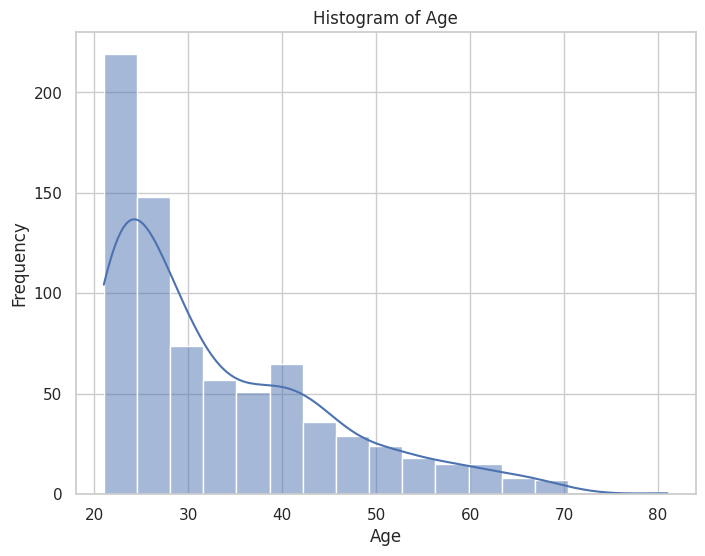

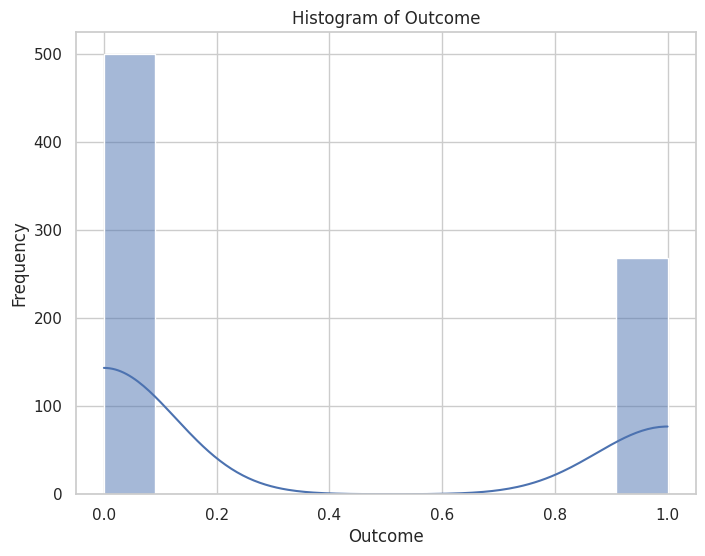

In [96]:
#Analysis:

#Skewness: If the histogram is asymmetrical, it indicates skewness. Right skewed (long tail on the right) or left skewed (long tail on the left).

#Presence of Outliers: Unusually high or low values that deviate from the rest of the data.

#Modality: Number of peaks in the distribution. Single peak (unimodal), two peaks (bimodal), etc.

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

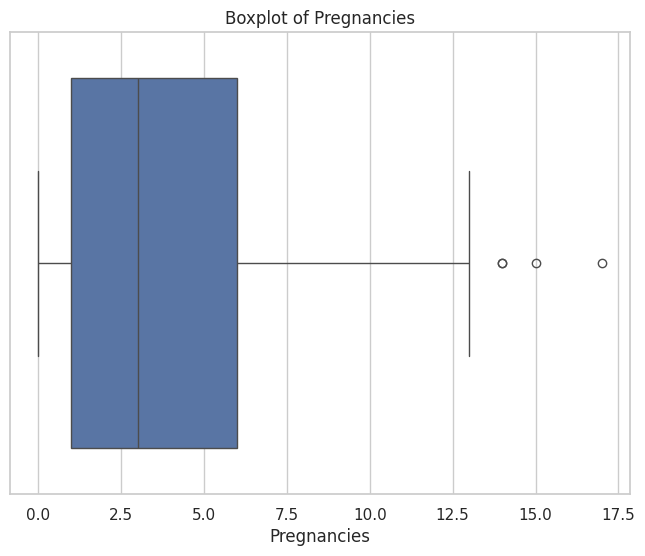

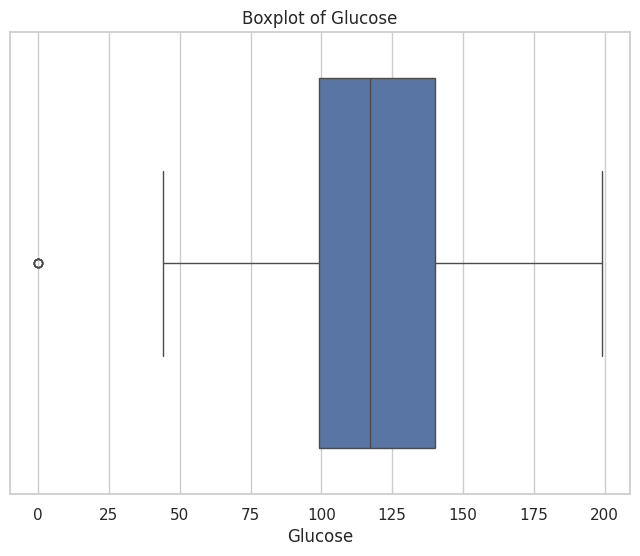

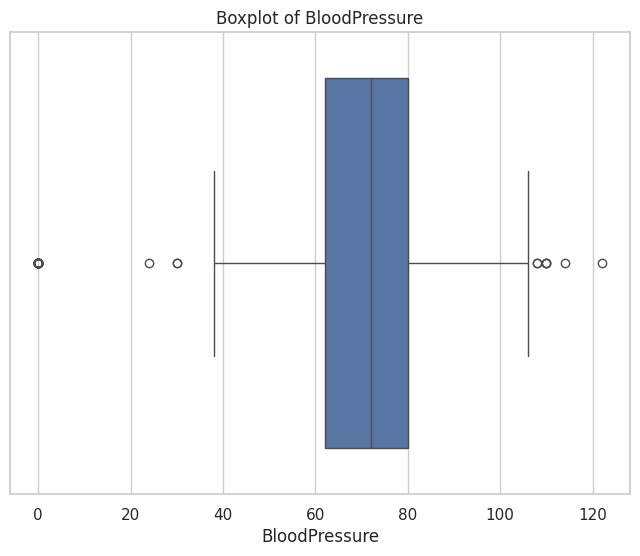

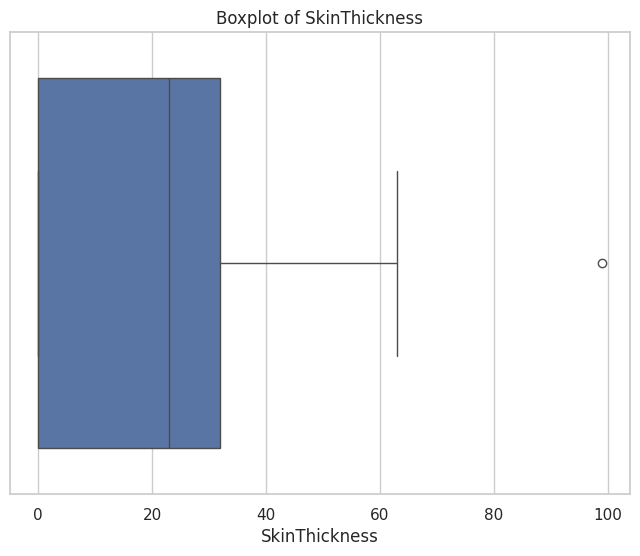

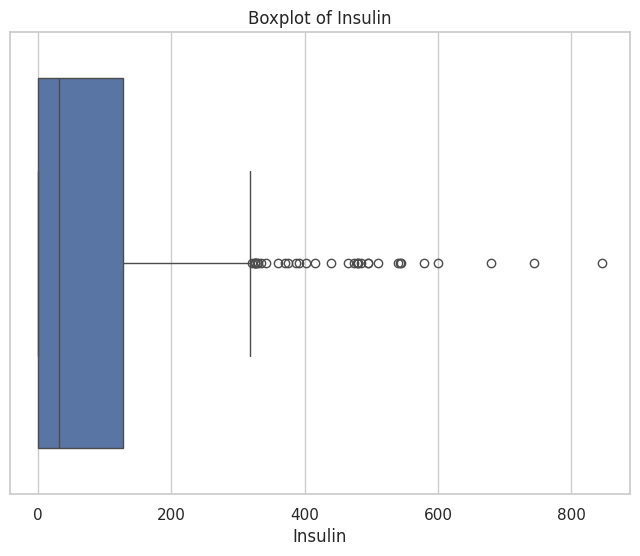

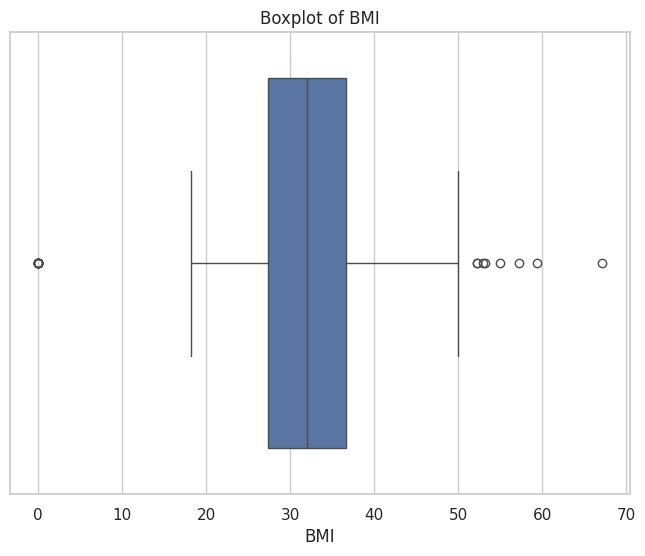

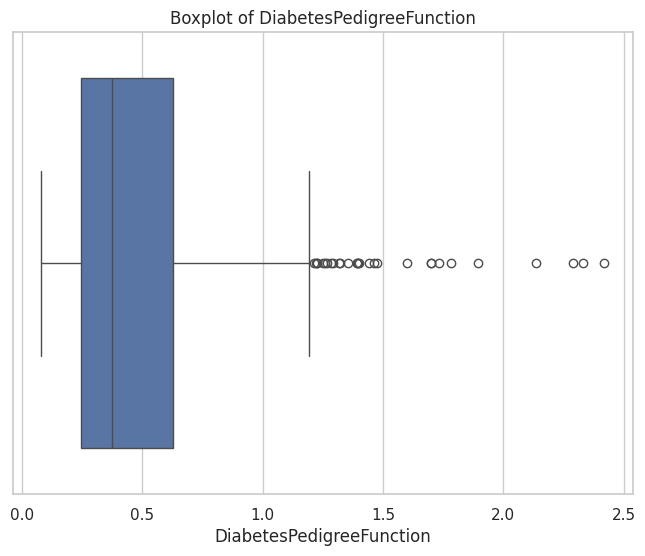

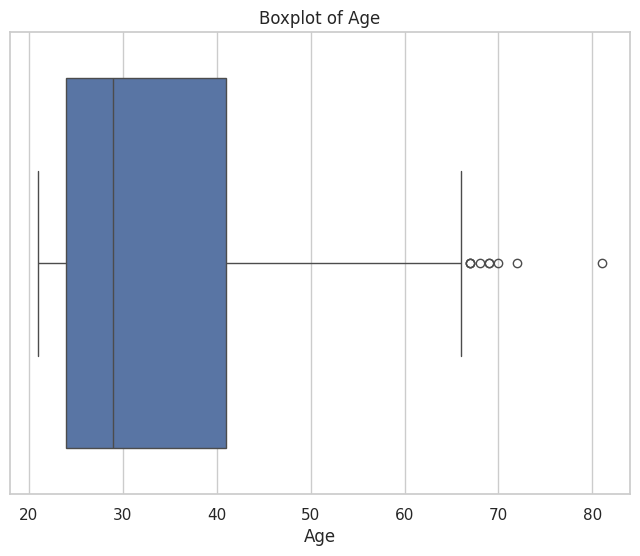

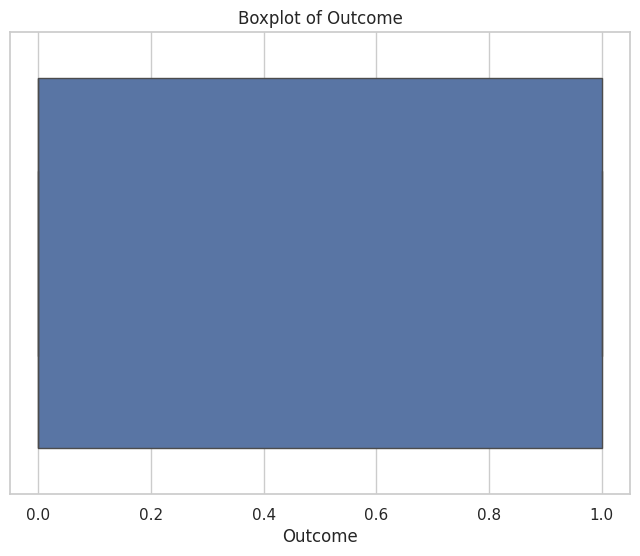

In [97]:
#Boxplot
sns.set(style="whitegrid")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [98]:
#Interpretation:
#Outliers: Points outside the whiskers (1.5 * IQR) indicate potential outliers.

#Interquartile Range (IQR): The range between the first quartile (25th percentile) and the third quartile (75th percentile). A larger IQR indicates more variability.

#Median Line: The line inside the box represents the median, providing insight into the data's central tendency.

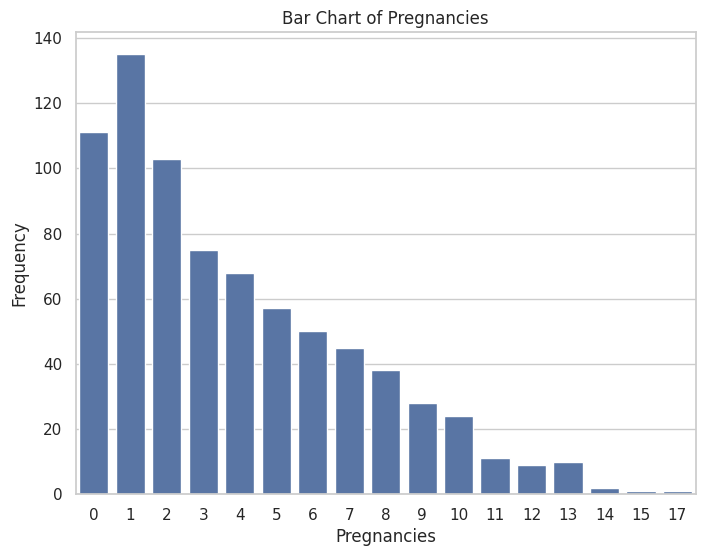

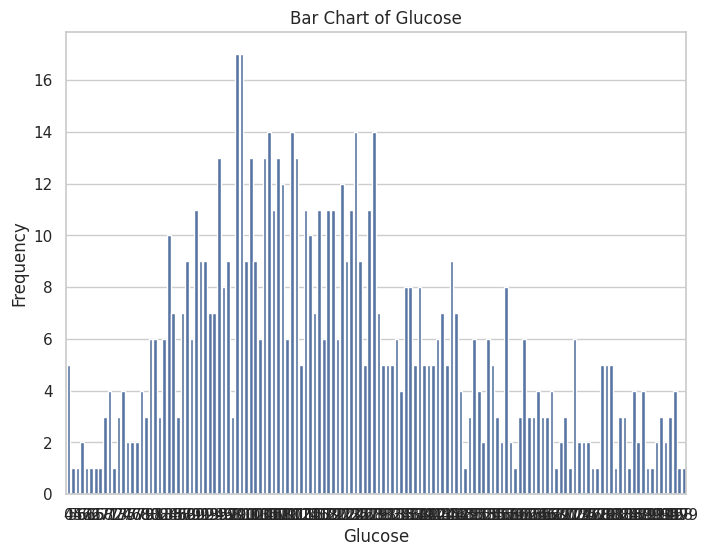

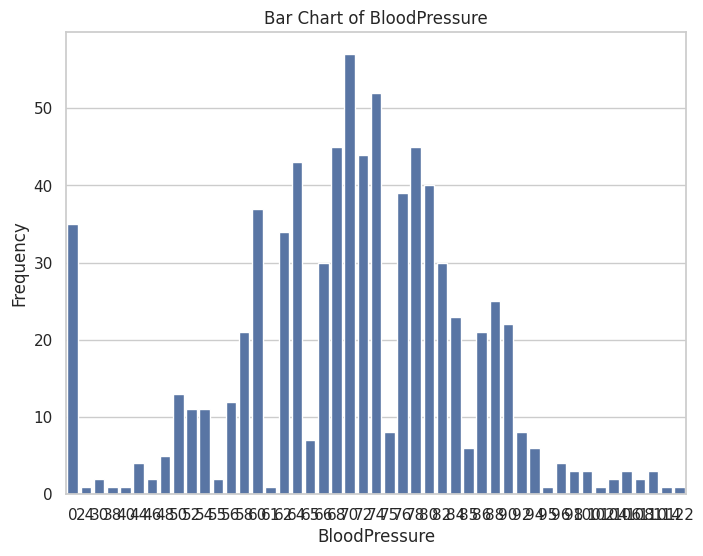

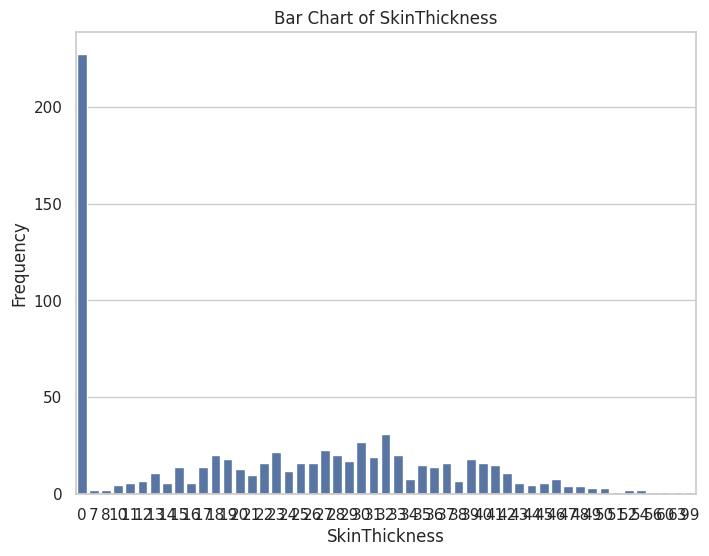

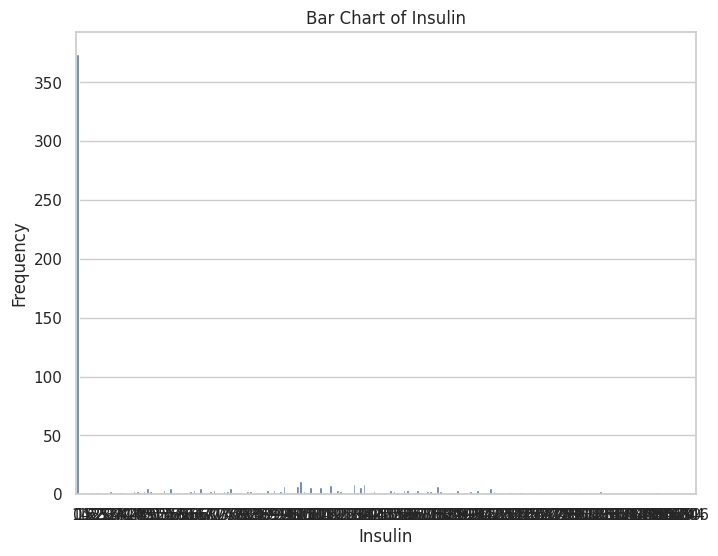

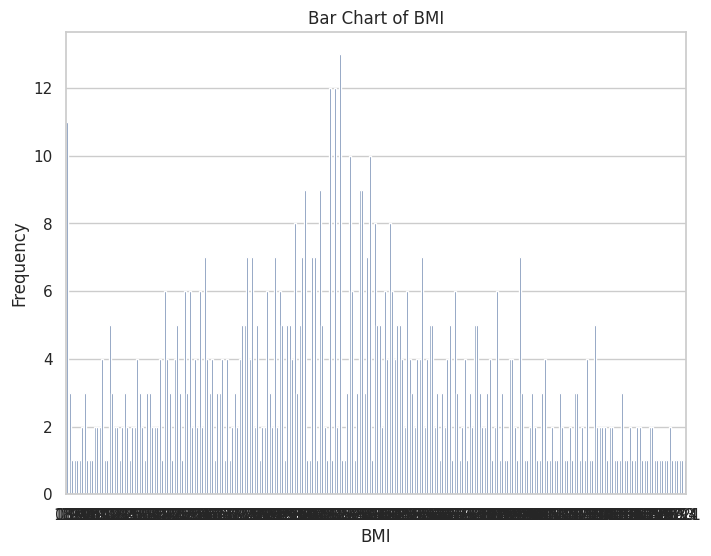

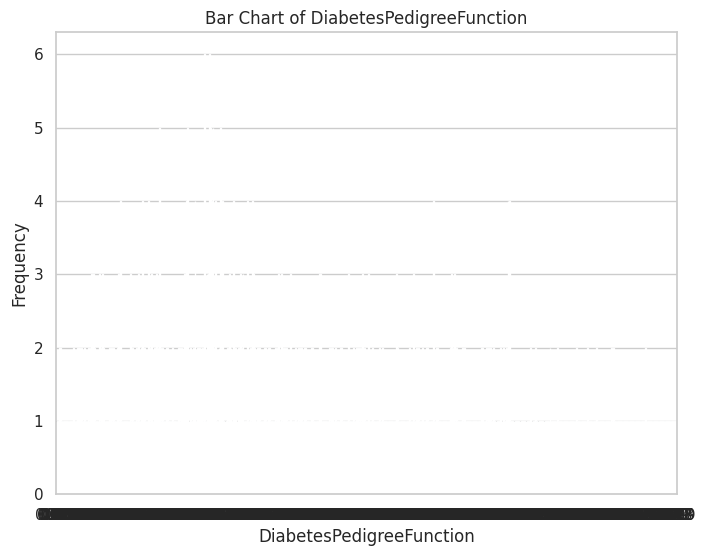

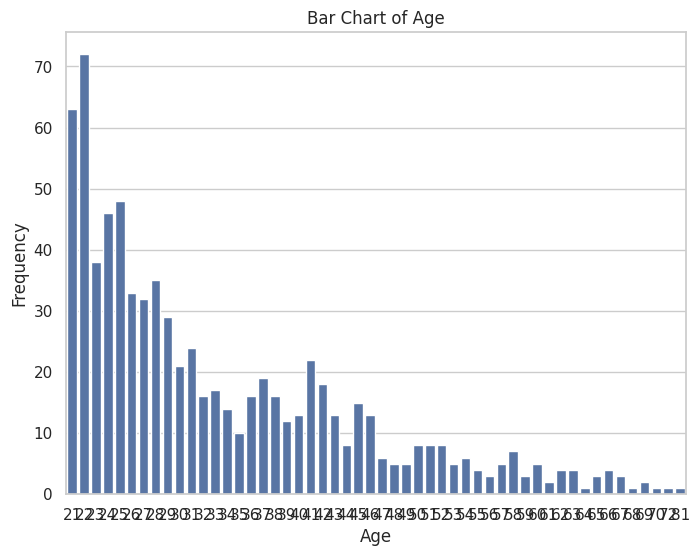

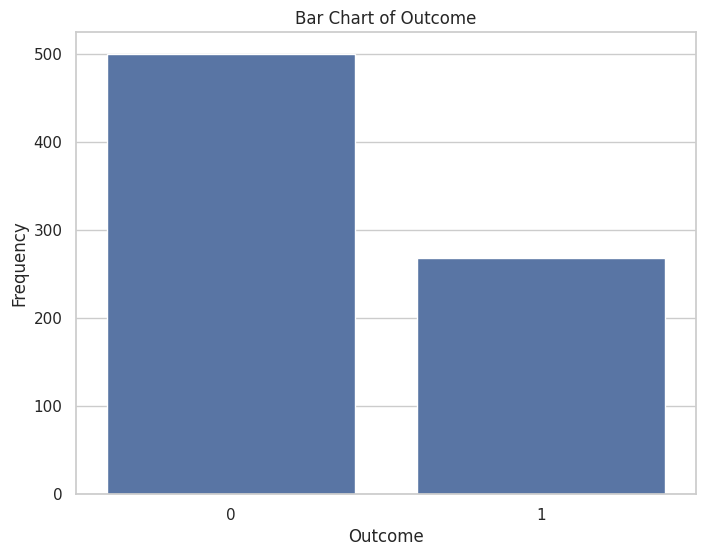

In [100]:
#Bar chart
sns.set(style="whitegrid")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

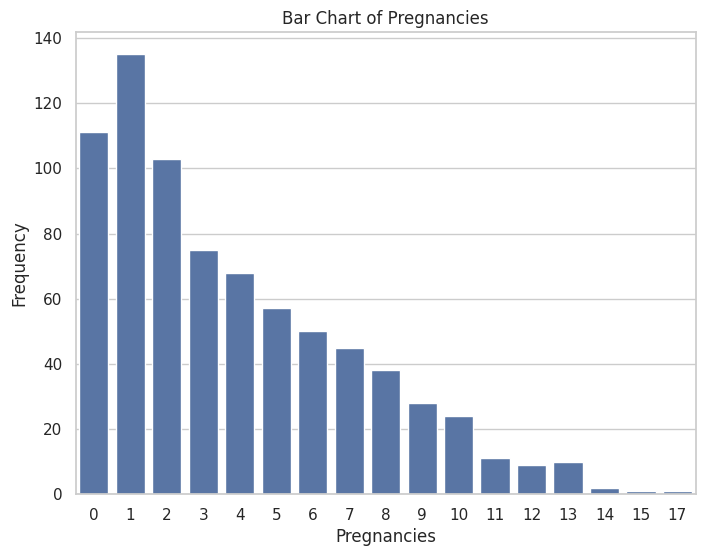

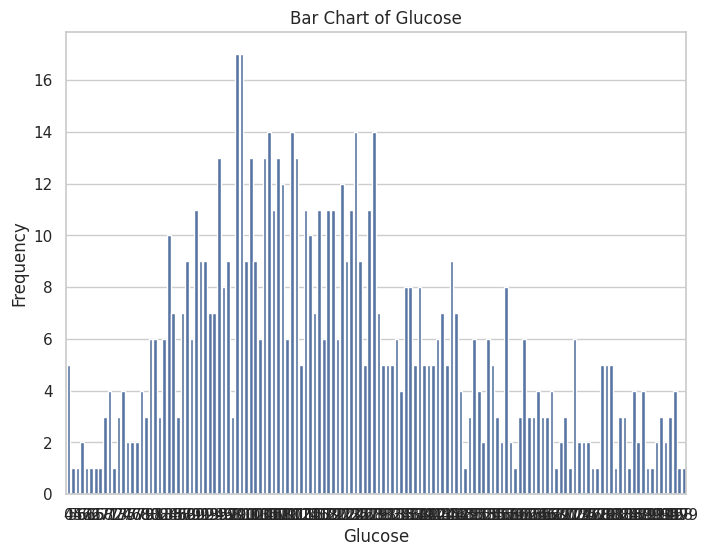

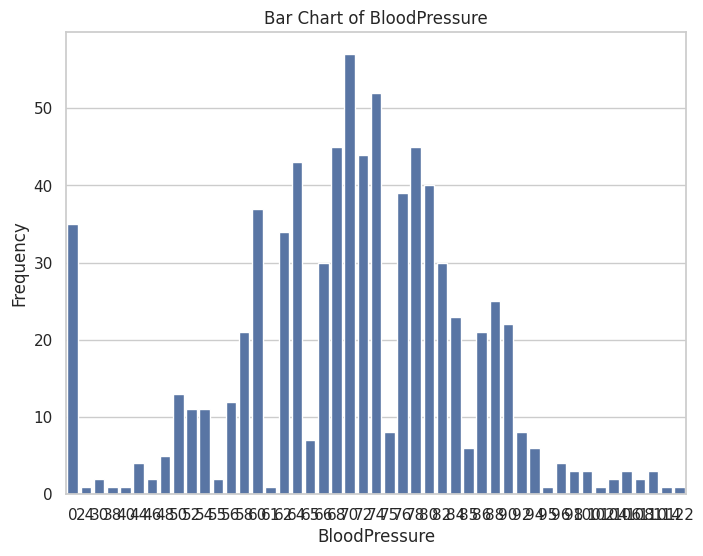

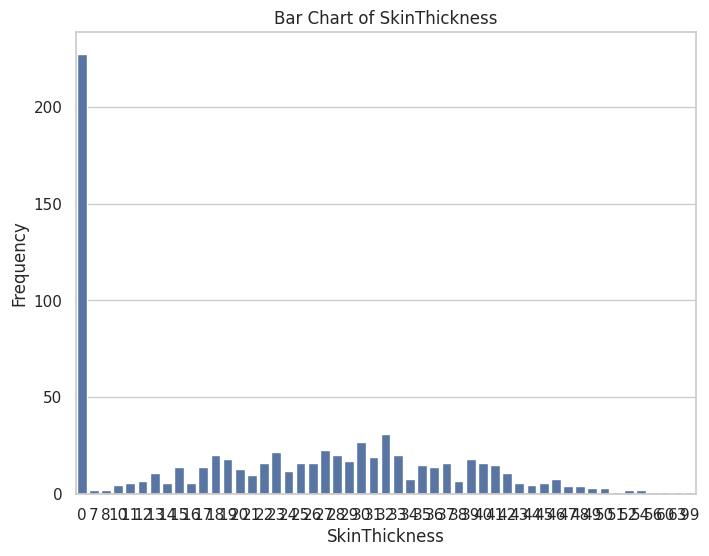

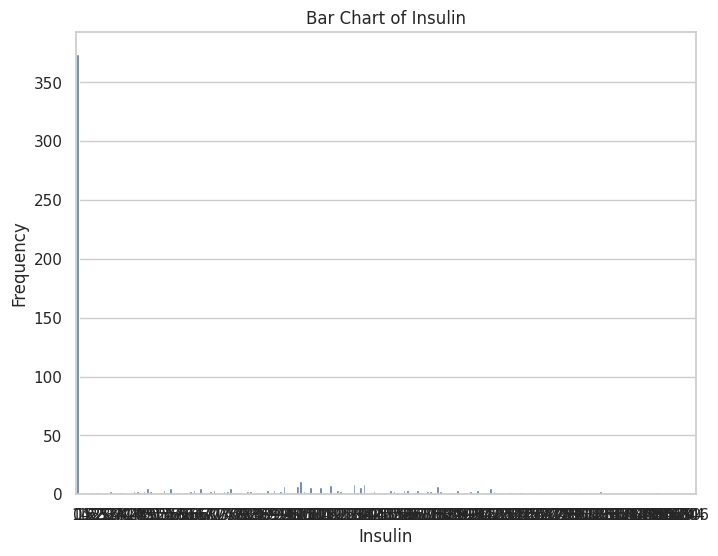

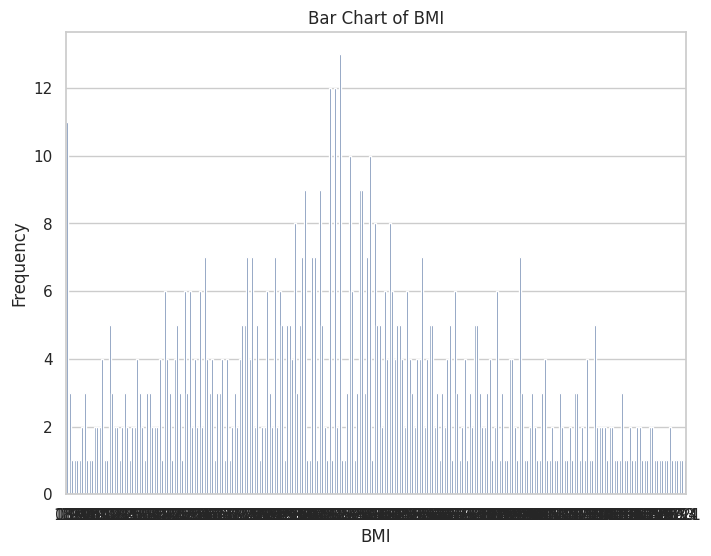

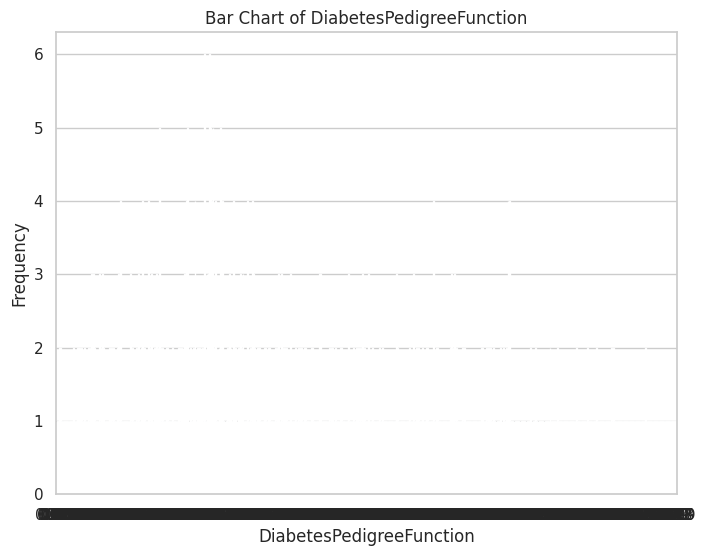

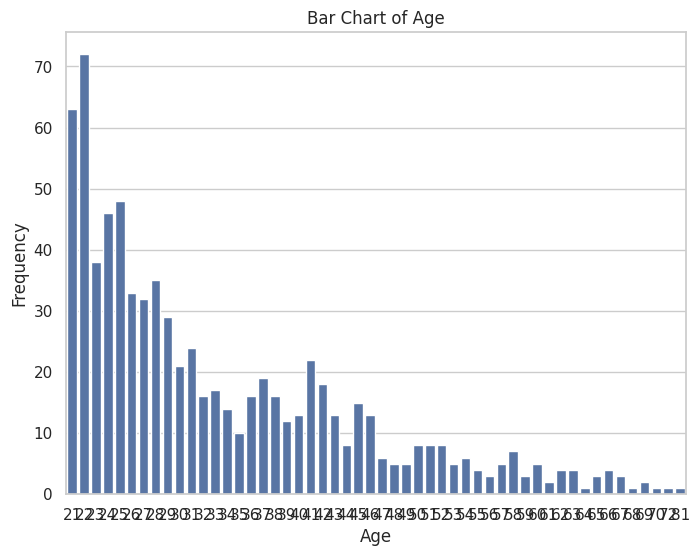

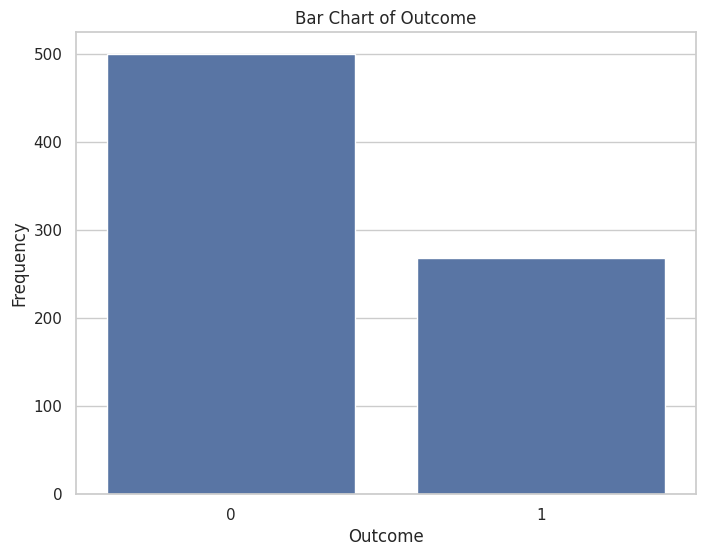

In [101]:
# Plot bar charts for each categorical column
sns.set(style="whitegrid")
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
#Insights:

#Dominant Categories: Categories with the highest counts can indicate popular choices or predominant groups in the dataset.

#Imbalanced Classes: Significant differences in category frequencies may affect modeling and require techniques like resampling.

In [103]:
#Standardization of Numerical Variables
#1. Concept of Standardization (Z-Score Normalization)
#Standardization transforms the data to have a mean of 0 and a standard deviation of
#Standardization of Numerical Variables
#1. Concept of Standardization (Z-Score Normalization)
#Standardization transforms the data to have a mean of 0 and a standard deviation of
#1. This process is crucial when features have different scales, ensuring that each feature contributes equally to the analysis or modeling.
#z = (x - μ) / σ
#where σ is the standard deviation, x is the original value, and μ is the mean.

In [105]:
#2. Applying Standardization
#We'll use StandardScaler from scikit-learn to standardize the numerical columns.
from sklearn.preprocessing import StandardScaler
## Initialize the scaler
scaler = StandardScaler()
## Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# Create a DataFrame with standardized data
df_standardized = pd.DataFrame(df, columns=numerical_columns)
## Display the first few rows of the standardized data
df_standardized.head()





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


In [107]:
scaler= StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_standardized = pd.DataFrame(df, columns=numerical_columns)
df_standardized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


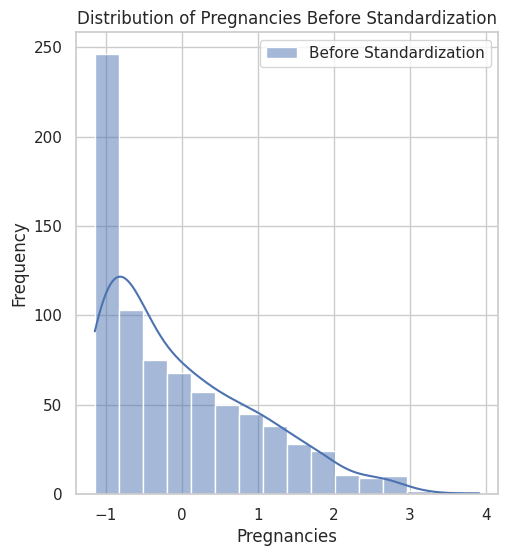

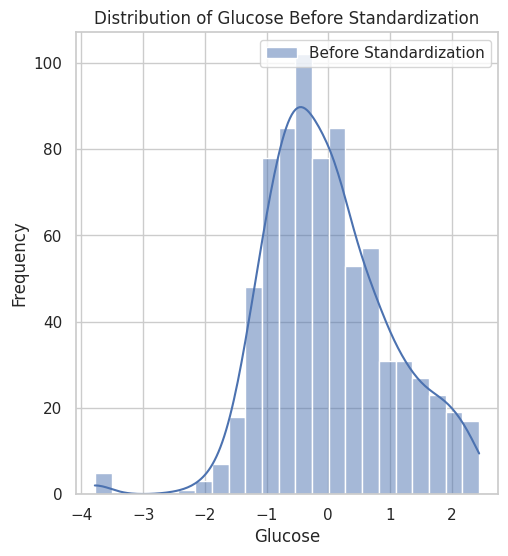

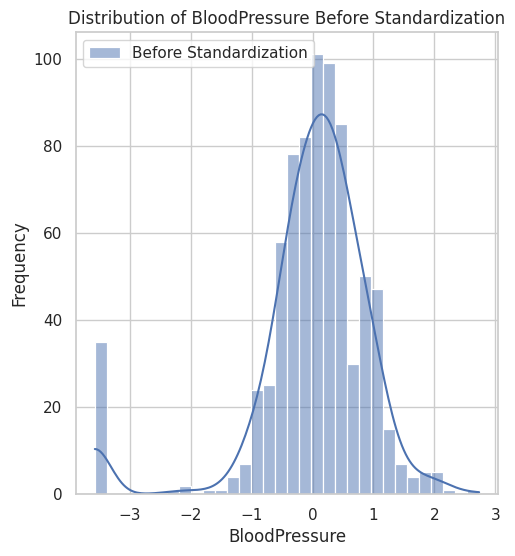

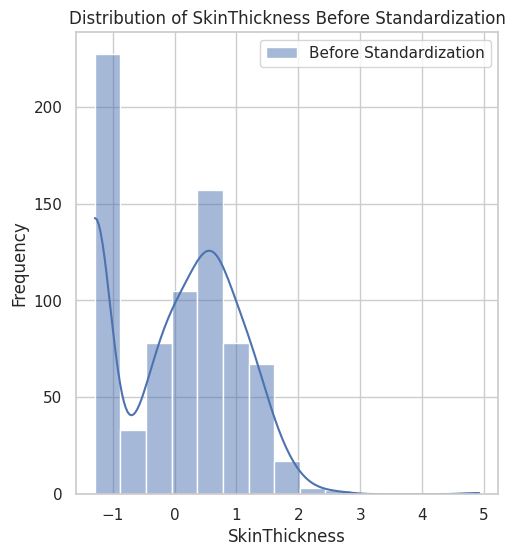

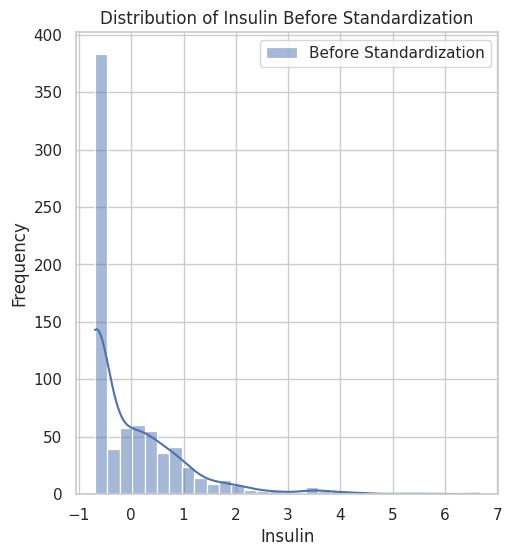

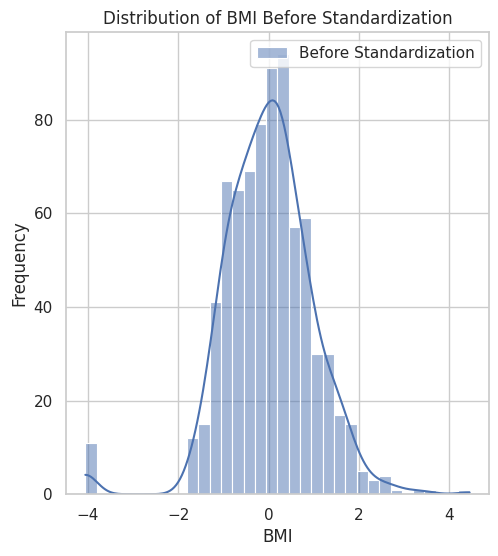

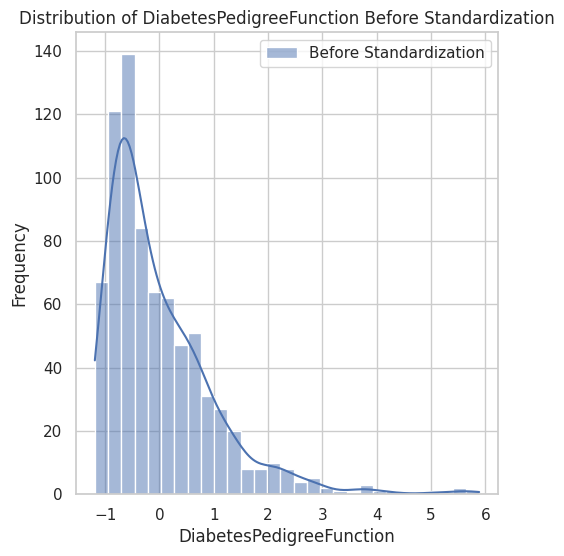

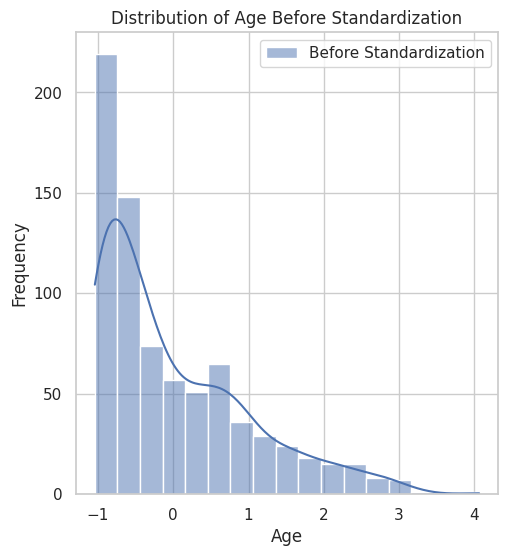

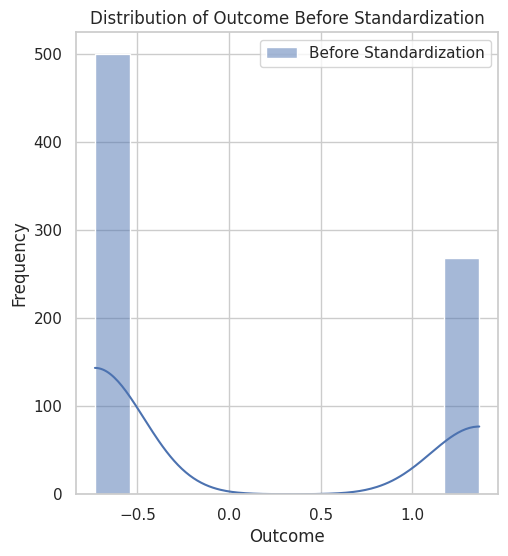

In [108]:
#3. Comparing Before and After Standardization
#Visual comparison helps in understanding the effect of standardization on data distribution.
# Compare distributions before and after standardization
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, label='Before Standardization')
    plt.title(f'Distribution of {column} Before Standardization')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()




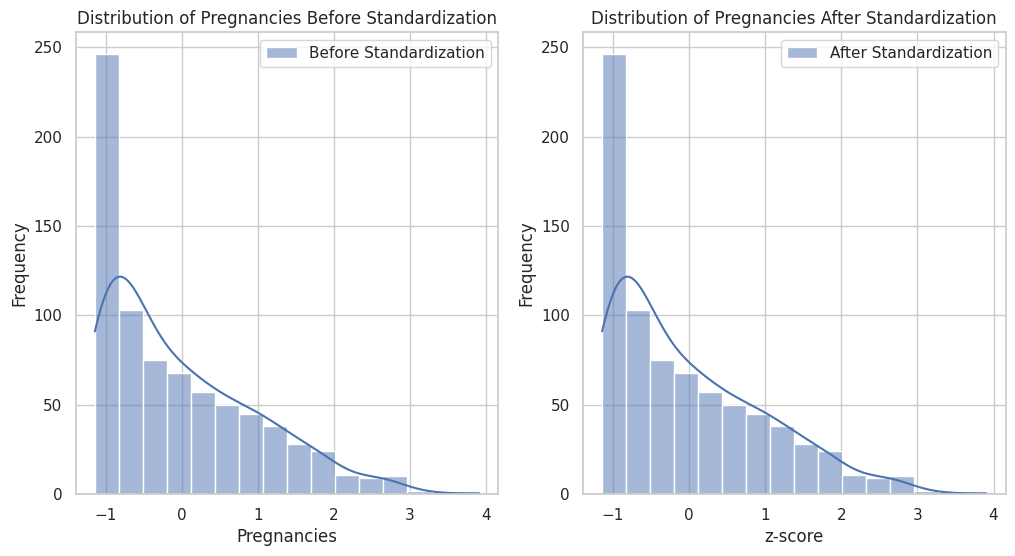

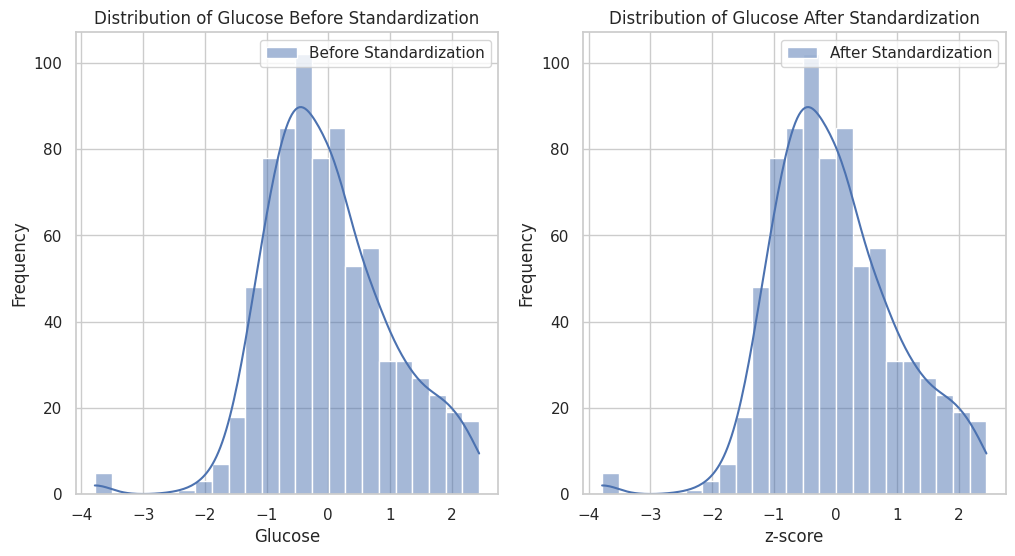

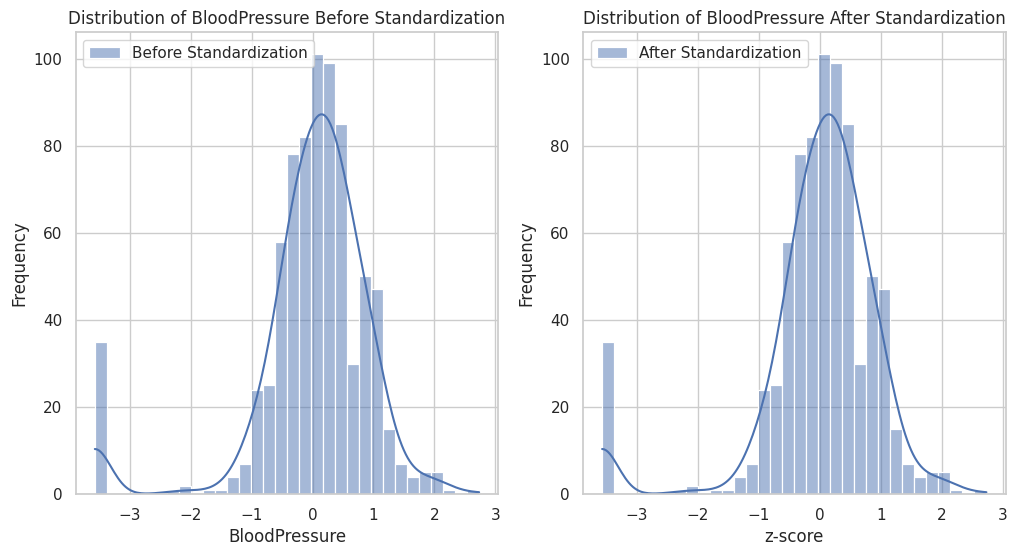

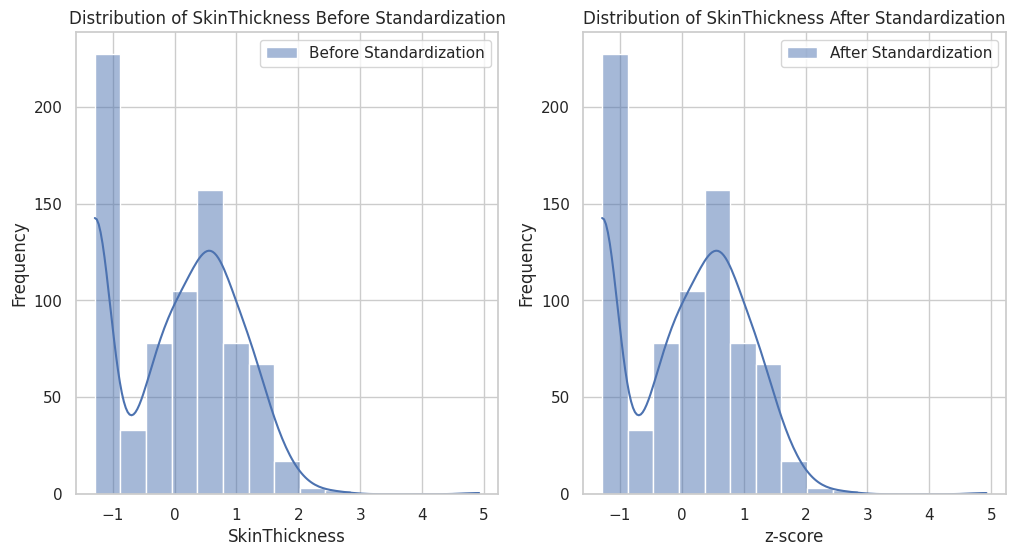

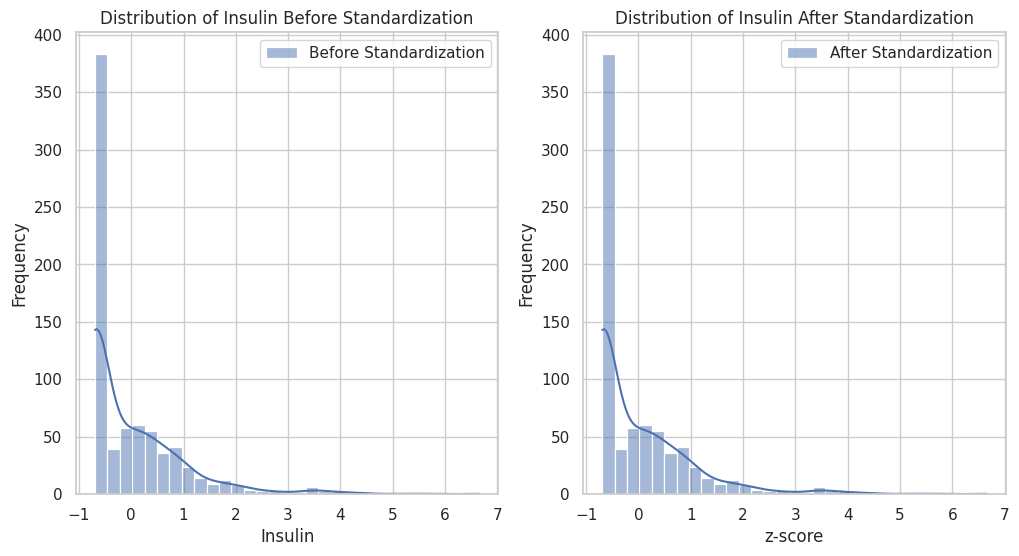

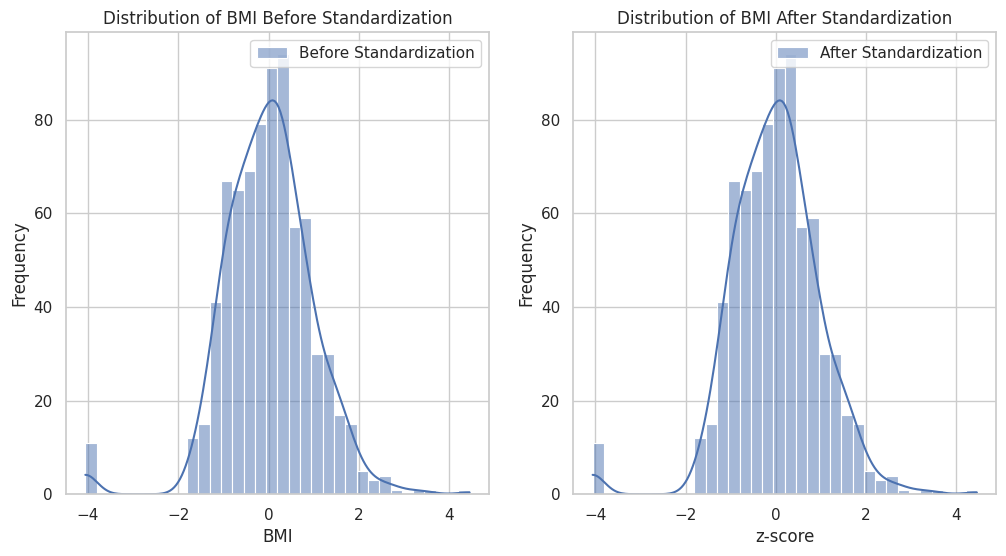

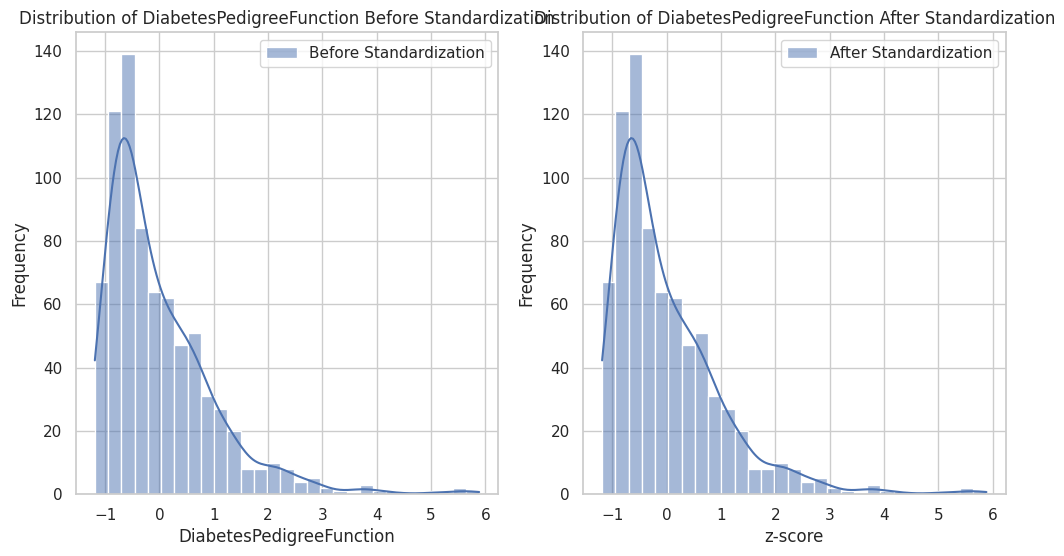

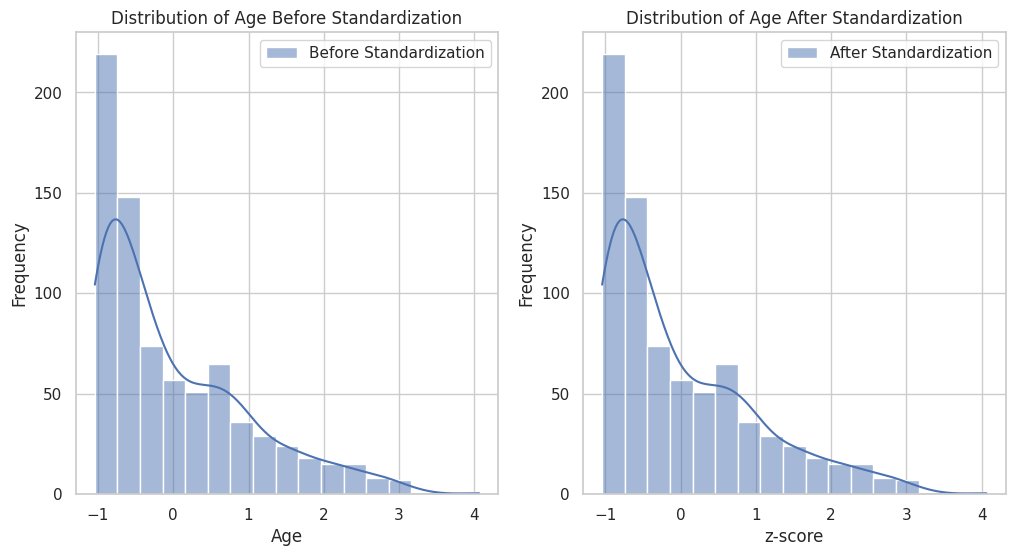

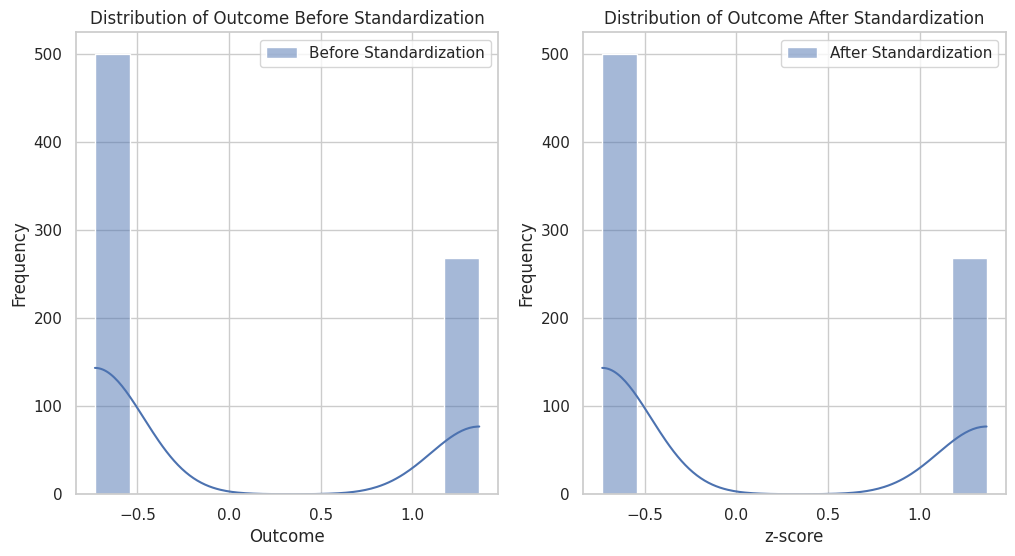

In [110]:
#after the standrazation
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, label='Before Standardization')
    plt.title(f'Distribution of {column} Before Standardization')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.subplot(1, 2, 2)
    sns.histplot(df_standardized[column], kde=True, label='After Standardization')
    plt.title(f'Distribution of {column} After Standardization')
    plt.xlabel('z-score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    Observations:

#Mean Shift: The standardized data should center around 0.

#Variance Reduction: The spread of the standardized data should be standardized, with most data points falling within the range of -3 to +3.

#Shape Preservation: The overall shape of the distribution remains similar post-standardization.



In [99]:
#Conversion of Categorical Data into Dummy Variables
#1. Need for One-Hot Encoding
#Machine Learning algorithms require numerical input. Categorical variables must be converted into a numerical format.
 #One-Hot Encoding transforms categorical variables into binary (0 or 1) columns, each representing a category.



In [113]:
#2. Applying One-Hot Encoding
#We'll use pandas.get_dummies() to perform one-hot encoding on categorical columns.
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Display the first few rows of the encoded data
#Parameters:
#columns: Specifies which columns to encode.
#drop_first=True: Avoids the dummy variable trap by dropping the first category.
df_encoded





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,-0.732120
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,-0.732120
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,-0.732120
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.365896


In [115]:
#. Displaying Transformed Dataset
# Display a subset of the encoded DataFrame
print(df_encoded)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

<Axes: >

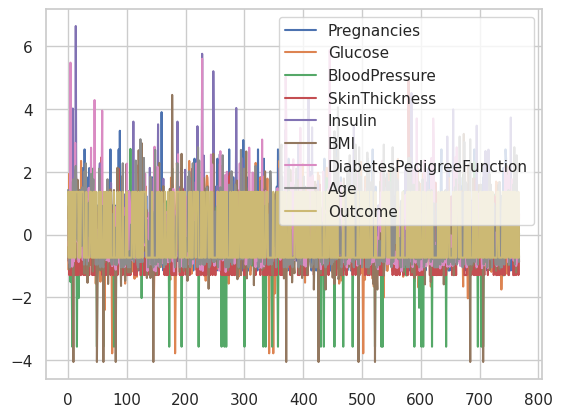

In [116]:
#plot encode
df_encoded.plot()


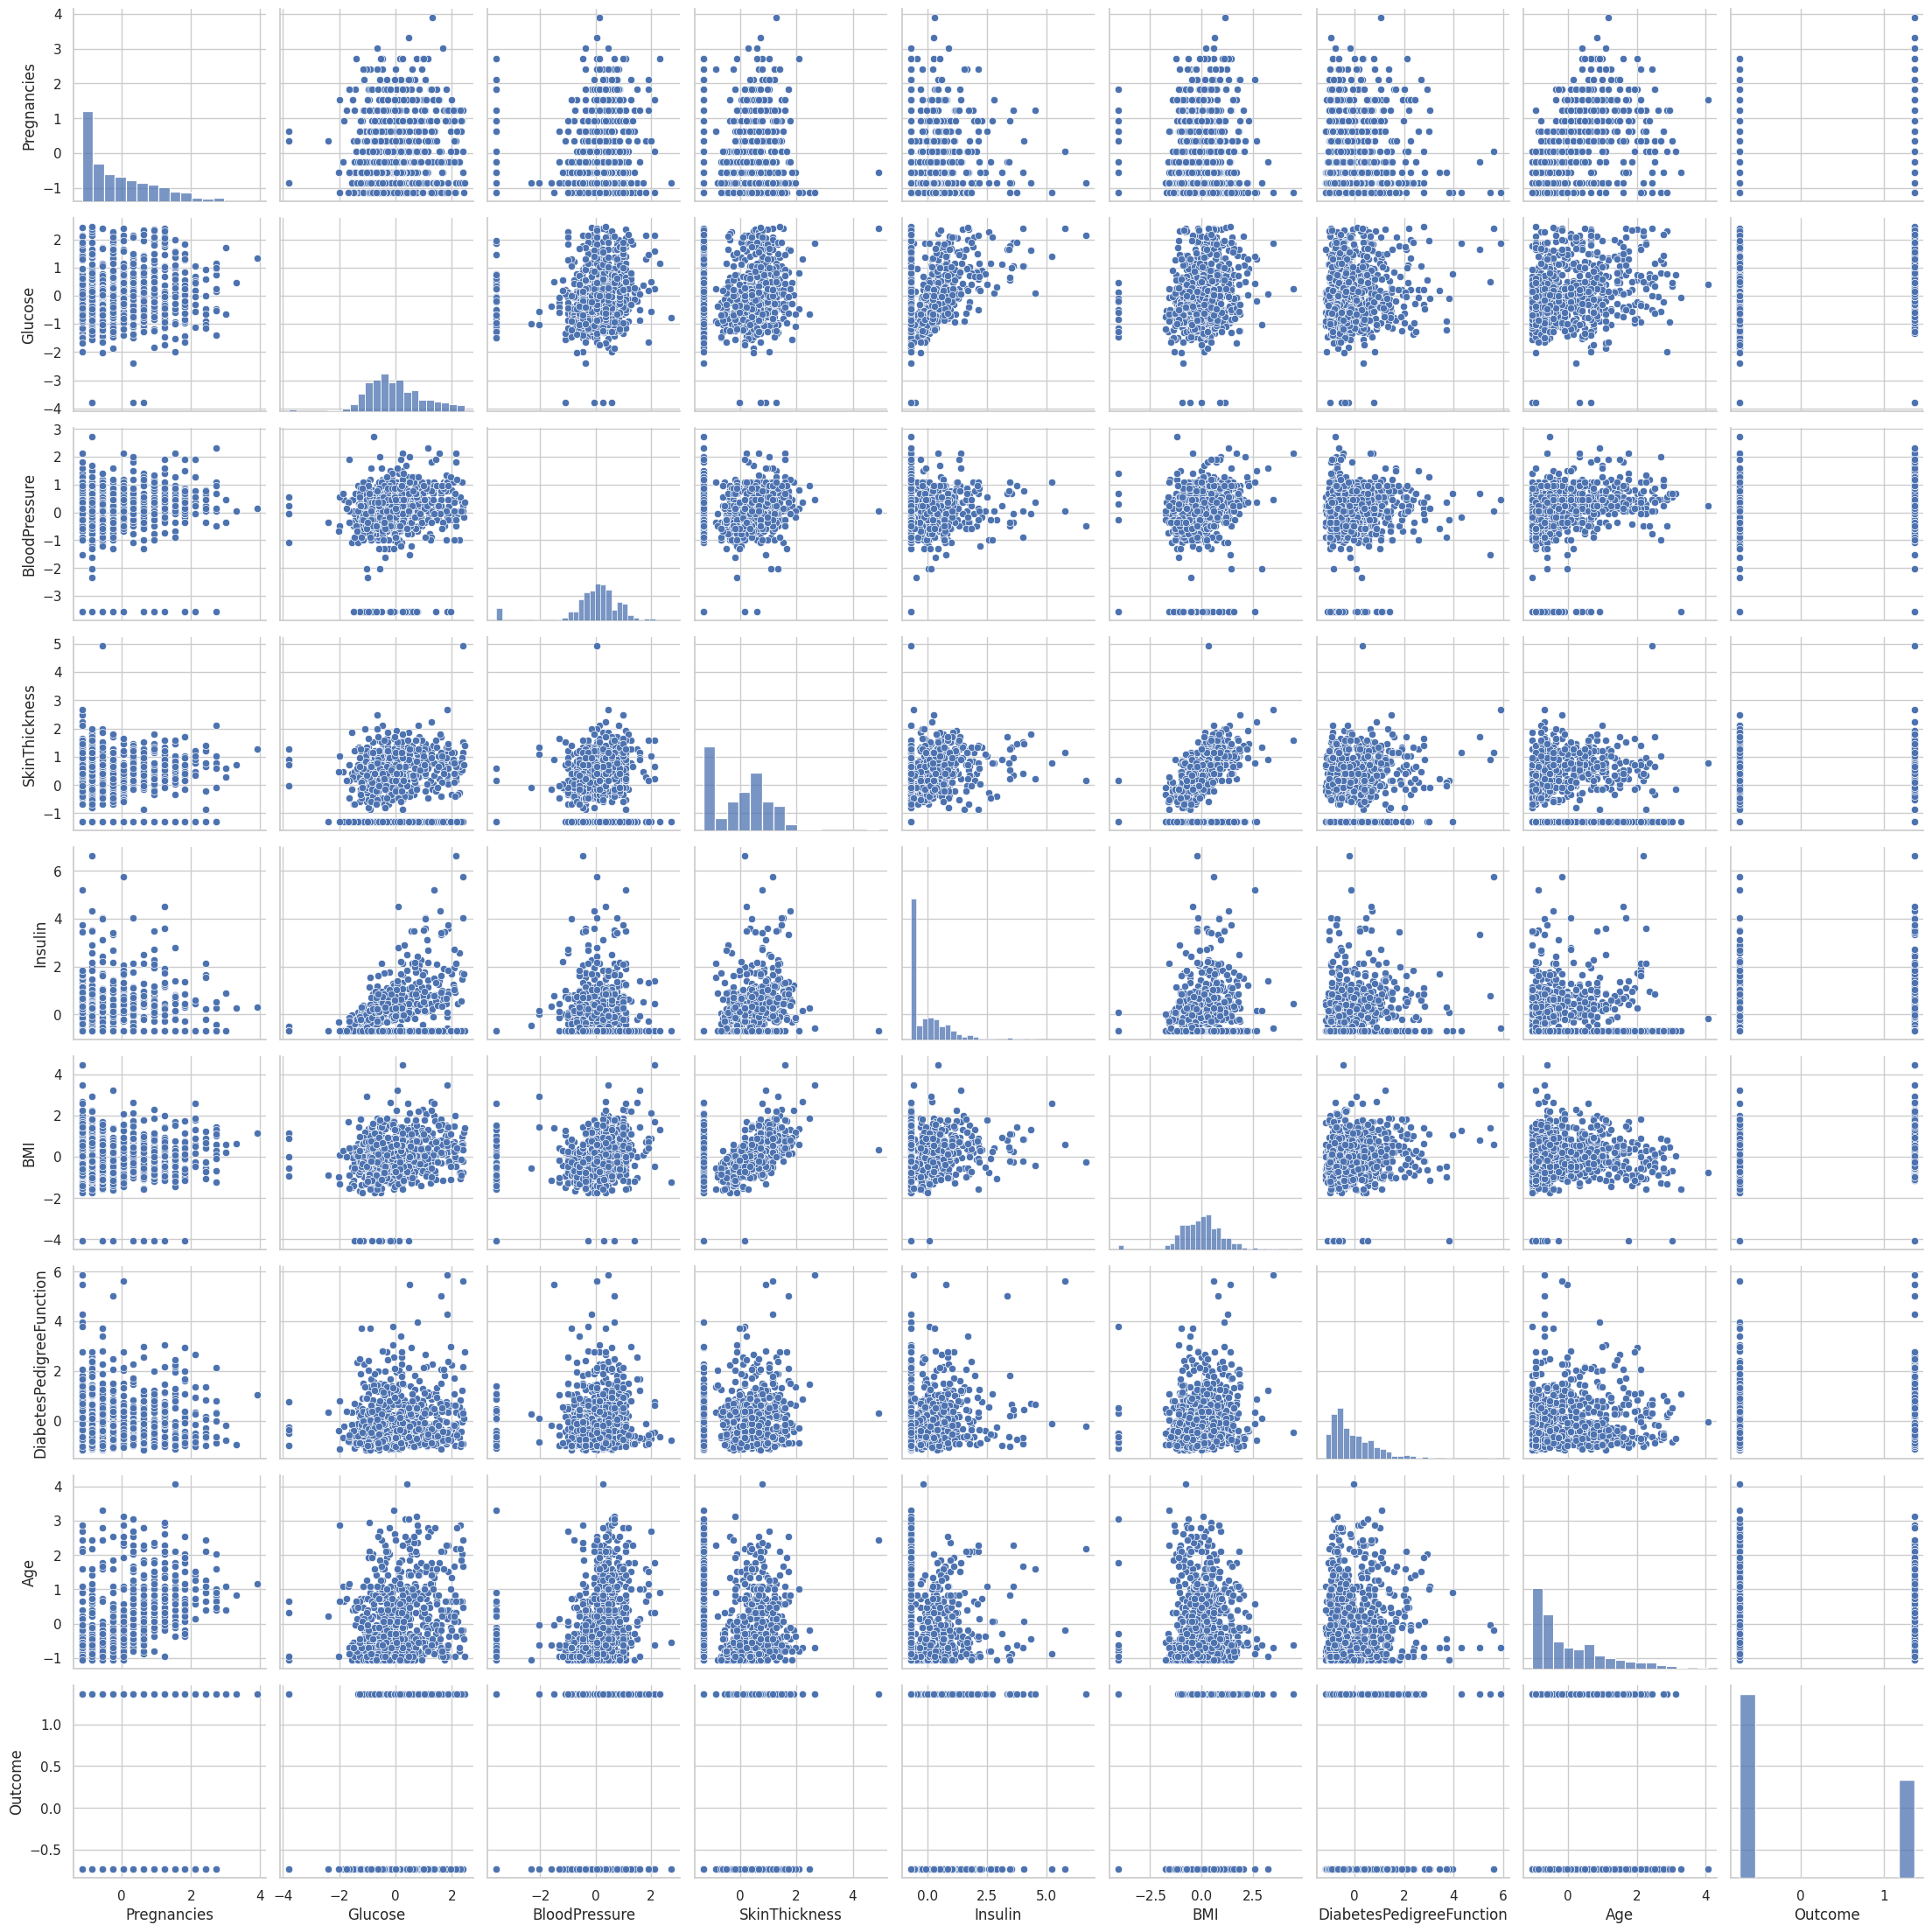

In [118]:
sns.pairplot(df_encoded)
plt.show()